In [1]:
# Import standard packages
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, OneHotEncoder
%matplotlib inline

In [2]:
# Import the data
df = pd.read_csv("./data/ln_price_dataframe")


# Investigating the data

In [3]:
df                  

,id,date,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,12.309982,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,13.195614,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,12.100712,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,13.311329,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,13.142166,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,12.793859,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,12.899220,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,12.904459,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,12.899220,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   ln_price       21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df1 = df.drop(df[['date', 'view', 'waterfront','condition','grade','zipcode','lat', 'long' ]], axis = 1)
df1.head()



,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,12.309982,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,1340,5650
1,6414100192,13.195614,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,1690,7639
2,5631500400,12.100712,2,1.00,770,10000,1.0,770,0.0,1933,NaN,2720,8062
3,2487200875,13.311329,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,1360,5000
4,1954400510,13.142166,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,1800,7503


In [6]:
df1.describe()

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000
mean,4.580474e+09,13.048211,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,1986.620318,12758.283512
std,2.876736e+09,0.526555,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,685.230472,27274.441950
min,1.000102e+06,11.264464,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,399.000000,651.000000
25%,2.123049e+09,12.682307,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,3.904930e+09,13.017003,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,7.308900e+09,13.377006,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,2360.000000,10083.000000
max,9.900000e+09,15.856731,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [7]:
df1.corr()


,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,1.000000,-0.003751,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.002701,-0.138557
ln_price,-0.003751,1.000000,0.343360,0.551249,0.695185,0.100025,0.310630,0.601579,0.080583,0.118174,0.619326,0.092281
bedrooms,0.001150,0.343360,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,0.393406,0.030690
bathrooms,0.005162,0.551249,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,0.569884,0.088303
sqft_living,-0.012241,0.695185,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,0.756402,0.184342
sqft_lot,-0.131911,0.100025,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,0.144763,0.718204
floors,0.018608,0.310630,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,0.280102,-0.010722
sqft_above,-0.010799,0.601579,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,0.731767,0.195077
yr_built,0.021617,0.080583,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,0.326377,0.070777
yr_renovated,-0.012010,0.118174,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,-0.000247,0.003852


<AxesSubplot:>

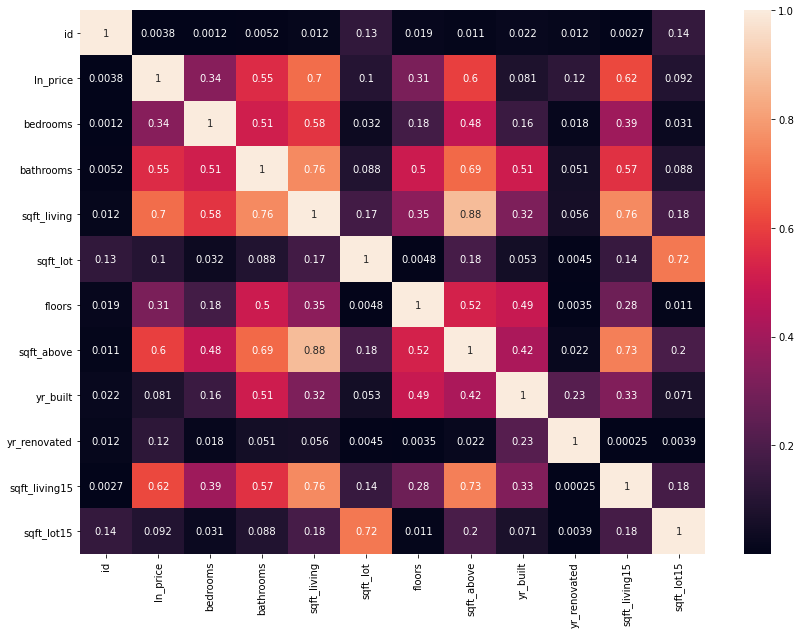

In [8]:
fig, ax = plt.subplots(figsize=(14,10))

sns.heatmap(df1.corr().abs(), annot=True)

In [9]:
df1.shape

(21597, 13)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   ln_price       21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   sqft_above     21597 non-null  int64  
 8   sqft_basement  21597 non-null  object 
 9   yr_built       21597 non-null  int64  
 10  yr_renovated   17755 non-null  float64
 11  sqft_living15  21597 non-null  int64  
 12  sqft_lot15     21597 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 2.1+ MB


In [11]:


df1.loc[df1.yr_renovated < 100]

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,12.309982,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,1340,5650
3,2487200875,13.311329,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,1360,5000
4,1954400510,13.142166,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,1800,7503
5,7237550310,14.022525,4,4.50,5420,101930,1.0,3890,1530.0,2001,0.0,4760,101930
6,1321400060,12.458775,3,2.25,1715,6819,2.0,1715,?,1995,0.0,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,12.793859,3,2.50,1530,1131,3.0,1530,0.0,2009,0.0,1530,1509
21593,6600060120,12.899220,4,2.50,2310,5813,2.0,2310,0.0,2014,0.0,1830,7200
21594,1523300141,12.904459,2,0.75,1020,1350,2.0,1020,0.0,2009,0.0,1020,2007
21595,291310100,12.899220,3,2.50,1600,2388,2.0,1600,0.0,2004,0.0,1410,1287


In [12]:
df1['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [13]:
df1['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
df1.loc[df1['yr_renovated'] != 0].describe()

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,4.586000e+03,4586.000000,4586.000000,4586.000000,4586.000000,4586.000000,4586.000000,4586.000000,4586.000000,744.000000,4586.000000,4586.000000
mean,4.540436e+09,13.093221,3.366768,2.128543,2105.035543,14572.455517,1.489097,1791.733973,1965.462931,1995.928763,1974.254252,12442.037942
std,2.883830e+09,0.556987,0.926420,0.800027,954.659312,38062.854366,0.537159,836.184524,30.626772,15.599946,691.246456,25286.914730
min,3.600057e+06,11.264464,1.000000,0.500000,500.000000,635.000000,1.000000,490.000000,1900.000000,1934.000000,460.000000,651.000000
25%,2.026057e+09,12.706846,3.000000,1.750000,1430.000000,5013.000000,1.000000,1200.000000,1944.000000,1987.000000,1470.000000,5051.500000
50%,3.891600e+09,13.055689,3.000000,2.250000,1940.000000,7620.000000,1.500000,1570.000000,1967.000000,2000.000000,1820.000000,7609.500000
75%,7.237538e+09,13.429848,4.000000,2.500000,2600.000000,10857.500000,2.000000,2210.000000,1991.000000,2007.250000,2330.000000,10125.000000
max,9.900000e+09,15.856731,11.000000,8.000000,12050.000000,881654.000000,3.500000,8570.000000,2015.000000,2015.000000,5790.000000,392040.000000


In [15]:
df1.loc[df1['yr_renovated'] == 0].describe()

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,1.701100e+04,17011.000000,17011.000000,17011.000000,17011.000000,1.701100e+04,17011.000000,17011.000000,17011.000000,17011.0,17011.000000,17011.000000
mean,4.591268e+09,13.036077,3.374934,2.112398,2073.659279,1.524147e+04,1.495444,1787.751102,1972.492328,0.0,1989.954089,12843.540239
std,2.874810e+09,0.517392,0.926286,0.760386,907.913731,4.227023e+04,0.540369,825.496535,28.848231,0.0,683.581726,27786.030994
min,1.000102e+06,11.289782,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.0,399.000000,659.000000
25%,2.129700e+09,12.676076,3.000000,1.750000,1421.000000,5.054500e+03,1.000000,1190.000000,1954.000000,0.0,1490.000000,5100.000000
50%,3.904990e+09,13.011432,3.000000,2.250000,1910.000000,7.616000e+03,1.500000,1560.000000,1977.000000,0.0,1840.000000,7621.000000
75%,7.334501e+09,13.360435,4.000000,2.500000,2540.000000,1.062150e+04,2.000000,2210.000000,1998.000000,0.0,2370.000000,10072.500000
max,9.895000e+09,15.745582,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,0.0,6210.000000,871200.000000


In [16]:
df1.loc[df1['yr_renovated'] > 0].describe()

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,7.440000e+02,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,4.418716e+09,13.345169,3.459677,2.306116,2327.377688,16215.530914,1.504704,1878.719086,1939.455645,1995.928763,1988.877688,13390.768817
std,2.908265e+09,0.620570,1.068823,0.898233,1089.002040,38235.308760,0.493202,849.441413,22.088850,15.599946,715.440144,26213.648057
min,3.600057e+06,11.608236,1.000000,0.750000,520.000000,1024.000000,1.000000,520.000000,1900.000000,1934.000000,828.000000,1281.000000
25%,1.922985e+09,12.929385,3.000000,1.750000,1560.000000,5000.000000,1.000000,1267.500000,1921.000000,1987.000000,1460.000000,5000.000000
50%,3.899100e+09,13.317102,3.000000,2.250000,2200.000000,7375.000000,1.500000,1730.000000,1941.500000,2000.000000,1850.000000,7455.000000
75%,7.014200e+09,13.710150,4.000000,2.750000,2872.500000,12670.750000,2.000000,2300.000000,1955.000000,2007.250000,2380.000000,10925.750000
max,9.829200e+09,15.856731,11.000000,8.000000,12050.000000,478288.000000,3.000000,8570.000000,2003.000000,2015.000000,5500.000000,310582.000000


In [22]:
df1['sqft_basement'] = df1['sqft_basement'].replace('?', '0.0')
df1['sqft_basement'] = pd.to_numeric(df1['sqft_basement'], errors='coerce')
df1['sqft_basement']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [24]:
df1['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64